<a href="https://colab.research.google.com/github/Wilson-roy/Lab-0_Operations_Research_Assignments/blob/main/Project_Assignments/LPAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

In [15]:
!pip install pulp


SET 03 PROBLEM 3

1. PROBLEM STATEMENT
Constraints:
x + y ≤ 8
5x + y ≥ 15
x ≥ 0, y ≥ 0
Objective: Maximize P = 3x + 2y

Feasible vertices (unordered): [(1.75, 6.25), (3.0, 0.0), (8.0, 0.0)]

Vertices in order (clockwise from smallest x):
Vertex 1: (7/4, 25/4)  ≈ (1.750, 6.250)
Vertex 2: (8, 0)  ≈ (8.000, 0.000)
Vertex 3: (3, 0)  ≈ (3.000, 0.000)


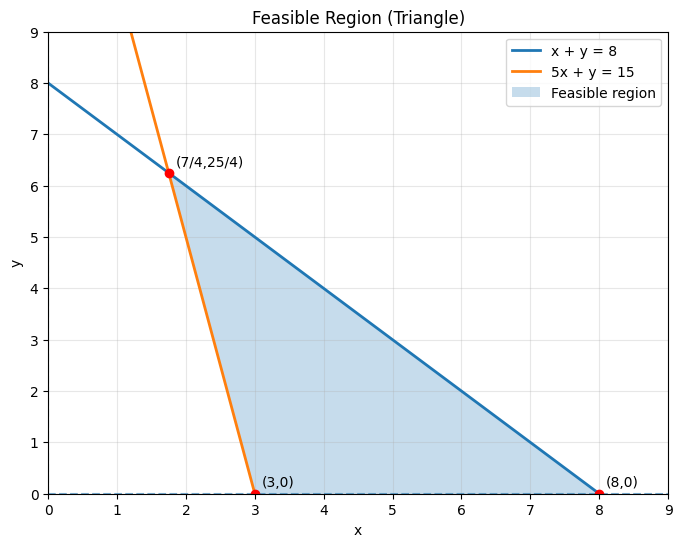


Slack / Surplus variables:
(1.750, 6.250) -> s1 = 0.000, s2 = 0.000
(8.000, 0.000) -> s1 = 0.000, s2 = 25.000
(3.000, 0.000) -> s1 = 5.000, s2 = 0.000

Evaluating objective function P = 3x + 2y:
At (1.750, 6.250): P = 17.750
At (8.000, 0.000): P = 24.000
At (3.000, 0.000): P = 9.000

✅ Maximum P = 24.000 at vertex (8.0, 0.0)

Verification with PuLP solver:
Solver status: Optimal
x = 8.000, y = 0.000, P = 24.000

FINAL RESULTS – SET 03 PROBLEM 3
Shape: triangle
Vertices (in order): [(Fraction(7, 4), Fraction(25, 4)), (Fraction(8, 1), Fraction(0, 1)), (Fraction(3, 1), Fraction(0, 1))]
Maximum at: (8.0, 0.0) with P = 24.000


In [16]:
# ===========================
# SET 03 – LINEAR PROGRAMMING: PROBLEM 3
# ===========================

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
import pulp

print("=" * 60)
print("SET 03 PROBLEM 3")
print("=" * 60)

# 1️⃣ Problem statement
print("\n1. PROBLEM STATEMENT")
print("Constraints:")
print("x + y ≤ 8")
print("5x + y ≥ 15")
print("x ≥ 0, y ≥ 0")
print("Objective: Maximize P = 3x + 2y")
print()

# 2️⃣ Compute candidate intersections and filter feasible points
candidates = []

# Constraint lines
A = np.array([[1.0, 1.0], [5.0, 1.0]])
b = np.array([8.0, 15.0])
x_int, y_int = np.linalg.solve(A, b)  # Intersection of x+y=8 and 5x+y=15
candidates.append((x_int, y_int))     # (7/4, 25/4)

# Axis intersections
candidates += [(8.0, 0.0), (3.0, 0.0), (0.0, 8.0), (0.0, 15.0)]

# Filter feasible region
tol = 1e-9
feasible = []
for x, y in candidates:
    if (x >= -tol and y >= -tol and
        x + y <= 8 + tol and
        5*x + y >= 15 - tol):
        feasible.append((float(x), float(y)))

# Deduplicate
feasible = sorted({(round(x, 8), round(y, 8)) for x, y in feasible}, key=lambda p: (p[0], p[1]))
print("Feasible vertices (unordered):", feasible)

# 3️⃣ Order vertices (clockwise starting at smallest x)
V = np.array(feasible)
start_idx = np.lexsort((V[:, 1], V[:, 0]))[0]
center = V.mean(axis=0)
angles = np.arctan2(V[:, 1]-center[1], V[:, 0]-center[0])
order = np.argsort(-angles)
rot = list(order).index(start_idx)
Vcw = V[order][rot:].tolist() + V[order][:rot].tolist()

# Convert to fractions
def as_frac(v):
    return (Fraction(v[0]).limit_denominator(), Fraction(v[1]).limit_denominator())

Vcw_frac = [as_frac(v) for v in Vcw]

print("\nVertices in order (clockwise from smallest x):")
for i, (v, vf) in enumerate(zip(Vcw, Vcw_frac), 1):
    print(f"Vertex {i}: ({vf[0]}, {vf[1]})  ≈ ({v[0]:.3f}, {v[1]:.3f})")

# 4️⃣ Plot feasible region
x_vals = np.linspace(0, 9, 300)
y_upper = 8 - x_vals
y_lower = 15 - 5*x_vals

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_upper, label='x + y = 8', lw=2)
plt.plot(x_vals, y_lower, label='5x + y = 15', lw=2)
plt.axvline(0, ls='--', alpha=0.6)
plt.axhline(0, ls='--', alpha=0.6)
plt.fill_between(x_vals, y_lower, y_upper, where=(y_upper >= y_lower),
                 alpha=0.25, label='Feasible region')

for (x, y), (fx, fy) in zip(Vcw, Vcw_frac):
    plt.plot(x, y, 'ro')
    plt.annotate(f'({fx},{fy})', (x, y), xytext=(5, 5), textcoords='offset points')

plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region (Triangle)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 5️⃣ Slack and surplus variables
print("\nSlack / Surplus variables:")
for (x, y) in Vcw:
    s1 = 8 - (x + y)           # slack for x + y ≤ 8
    s2 = (5*x + y) - 15        # surplus for 5x + y ≥ 15
    print(f"({x:.3f}, {y:.3f}) -> s1 = {s1:.3f}, s2 = {s2:.3f}")

# 6️⃣ Evaluate objective function P = 3x + 2y
print("\nEvaluating objective function P = 3x + 2y:")
P_values = []
for (x, y) in Vcw:
    P = 3*x + 2*y
    P_values.append(P)
    print(f"At ({x:.3f}, {y:.3f}): P = {P:.3f}")

max_P = max(P_values)
best_vertex = Vcw[np.argmax(P_values)]
print(f"\n✅ Maximum P = {max_P:.3f} at vertex ({best_vertex[0]}, {best_vertex[1]})")

# 7️⃣ Verify with PuLP solver
print("\nVerification with PuLP solver:")
prob = pulp.LpProblem("Set03_Problem3", pulp.LpMaximize)
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)
prob += 3*x + 2*y
prob += x + y <= 8
prob += 5*x + y >= 15
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print(f"Solver status: {pulp.LpStatus[prob.status]}")
print(f"x = {x.varValue:.3f}, y = {y.varValue:.3f}, P = {pulp.value(prob.objective):.3f}")

print("\n" + "="*60)
print("FINAL RESULTS – SET 03 PROBLEM 3")
print("="*60)
print("Shape: triangle")
print(f"Vertices (in order): {Vcw_frac}")
print(f"Maximum at: ({best_vertex[0]}, {best_vertex[1]}) with P = {max_P:.3f}")


## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.


SET 04 PROBLEM 6

1. PROBLEM STATEMENT (LATEX READY)
\textbf{Decision Variables:}
Let \( x \) = number of deluxe models
Let \( y \) = number of standard models

\textbf{Objective Function:}
Maximize \( R = 266x + 190y \)

\textbf{Constraints:}
Production hours: \( 28x + 14y \leq 1008 \)
Material units: \( 66x + 55y \leq 3036 \)
Non-negativity: \( x \geq 0, y \geq 0 \)

2. FINDING CORNER POINTS
Feasible corner points: [(0.0, 0.0), (0.0, 55.2), (21.0, 30.0), (36.0, 0.0)]

3. GRAPHING FEASIBLE SET


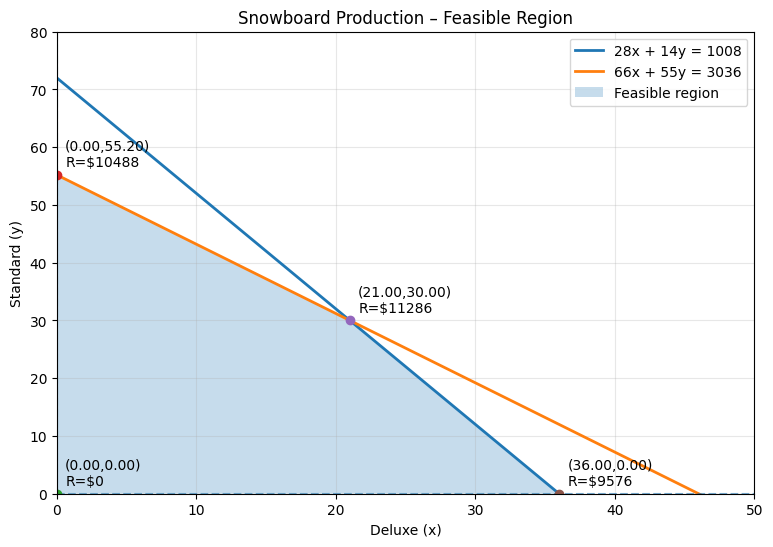


4. FINDING OPTIMAL SOLUTION OVER CORNERS
Corner (0, 0): Revenue = $0.00
Corner (0, 55): Revenue = $10488.00
Corner (21, 30): Revenue = $11286.00
Corner (36, 0): Revenue = $9576.00

Optimal production (corner check): x=21 deluxe, y=30 standard
Maximum revenue (corner check): $11286.00

5. SLACK VARIABLES AT OPTIMUM
At (21, 30): s1=0, s2=0 (both zero => both constraints bind)

6a. SciPy linprog (continuous)
Deluxe: 21, Standard: 30, Max revenue: $11286.00

6b. PuLP (integer LP)
Status: Optimal
Deluxe: 21, Standard: 30, Max revenue: $11286.00

FINAL ANSWERS FOR SET 04 PROBLEM 6
Deluxe models: 21
Standard models: 30
Maximum revenue: $11286


In [17]:
# ================================
# SET 04 – LINEAR PROGRAMMING: PROBLEM 6
# ================================

# 0) Imports (with a quiet PuLP fallback)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
try:
    import pulp
except Exception as e:
    raise RuntimeError("PuLP is not available in this environment. "
                       "In Colab, run: !pip install pulp") from e

print("\n" + "="*60)
print("SET 04 PROBLEM 6")
print("="*60)

# 1) PROBLEM STATEMENT (LATEX READY)
print("\n1. PROBLEM STATEMENT (LATEX READY)")
print(r"\textbf{Decision Variables:}")
print(r"Let \( x \) = number of deluxe models")
print(r"Let \( y \) = number of standard models")
print()
print(r"\textbf{Objective Function:}")
print(r"Maximize \( R = 266x + 190y \)")
print()
print(r"\textbf{Constraints:}")
print(r"Production hours: \( 28x + 14y \leq 1008 \)")
print(r"Material units: \( 66x + 55y \leq 3036 \)")
print(r"Non-negativity: \( x \geq 0, y \geq 0 \)")
print()

# 2) CORNER POINTS (build candidate set and filter)
print("2. FINDING CORNER POINTS")

# Constraint lines solved for y in terms of x (upper bounds)
def y_hours(x):     return (1008 - 28*np.asarray(x)) / 14
def y_material(x):  return (3036 - 66*np.asarray(x)) / 55

# Build candidates: axes intercepts + pairwise intersection
candidates = []

# Axes intercepts
candidates.append((0.0, 0.0))
candidates.append((1008/28, 0.0))  # hours x-intercept: 36
candidates.append((3036/66, 0.0))  # material x-intercept: 46 (likely infeasible w.r.t hours)
candidates.append((0.0, 1008/14))  # hours y-intercept: 72
candidates.append((0.0, 3036/55))  # material y-intercept: ~55.23636

# Intersection of the two constraints
A = np.array([[28.0, 14.0],
              [66.0, 55.0]])
b = np.array([1008.0, 3036.0])
x_star, y_star = np.linalg.solve(A, b)  # (21, 30)
candidates.append((x_star, y_star))

# Feasibility filter with tolerance
tol = 1e-9
feasible = []
for x, y in candidates:
    if (x >= -tol and y >= -tol and
        28*x + 14*y <= 1008 + tol and
        66*x + 55*y <= 3036 + tol):
        feasible.append((float(x), float(y)))

# Deduplicate and sort by x then y
feasible = sorted({(round(x, 8), round(y, 8)) for x, y in feasible},
                  key=lambda p: (p[0], p[1]))

print("Feasible corner points:", feasible)

# 3) GRAPH FEASIBLE SET
print("\n3. GRAPHING FEASIBLE SET")
x_vals = np.linspace(0, 50, 400)
y1 = y_hours(x_vals)
y2 = y_material(x_vals)
y_feas = np.minimum(y1, y2)

plt.figure(figsize=(9, 6))
plt.plot(x_vals, y1, linewidth=2, label='28x + 14y = 1008')
plt.plot(x_vals, y2, linewidth=2, label='66x + 55y = 3036')
plt.fill_between(x_vals, 0, np.maximum(0, y_feas), alpha=0.25, label='Feasible region')

# axes
plt.axvline(0, linestyle='--', alpha=0.6)
plt.axhline(0, linestyle='--', alpha=0.6)

# Corner markers + revenue labels
for x, y in feasible:
    R = 266*x + 190*y
    plt.plot(x, y, 'o')
    plt.annotate(f'({x:.2f},{y:.2f})\nR=${R:.0f}', (x, y),
                 xytext=(6, 6), textcoords='offset points')

plt.xlim(0, 50); plt.ylim(0, 80)
plt.xlabel('Deluxe (x)'); plt.ylabel('Standard (y)')
plt.title('Snowboard Production – Feasible Region')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4) EVALUATE OBJECTIVE AT CORNERS
print("\n4. FINDING OPTIMAL SOLUTION OVER CORNERS")
best_R = -np.inf
best_pt = None
for x, y in feasible:
    R = 266*x + 190*y
    print(f"Corner ({x:.0f}, {y:.0f}): Revenue = ${R:.2f}")
    if R > best_R:
        best_R = R
        best_pt = (x, y)

print(f"\nOptimal production (corner check): x={best_pt[0]:.0f} deluxe, y={best_pt[1]:.0f} standard")
print(f"Maximum revenue (corner check): ${best_R:.2f}")

# 5) SLACK VARIABLES AT THE OPTIMUM
print("\n5. SLACK VARIABLES AT OPTIMUM")
x_opt, y_opt = best_pt
s1 = 1008 - (28*x_opt + 14*y_opt)   # hours slack
s2 = 3036 - (66*x_opt + 55*y_opt)   # material slack
print(f"At ({x_opt:.0f}, {y_opt:.0f}): s1={s1:.0f}, s2={s2:.0f} (both zero => both constraints bind)")

# 6) SOLVE WITH BUILT-IN SOLVERS

# 6a) SciPy (continuous LP)
print("\n6a. SciPy linprog (continuous)")
c = np.array([-266.0, -190.0])  # negate for maximization
A_ub = np.array([[28.0, 14.0],
                 [66.0, 55.0]])
b_ub = np.array([1008.0, 3036.0])
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0, None), method="highs")

if res.success:
    xs, ys = res.x
    Rs = 266*xs + 190*ys
    print(f"Deluxe: {xs:.6g}, Standard: {ys:.6g}, Max revenue: ${Rs:.2f}")
else:
    print("linprog failed:", res.message)

# 6b) PuLP (integer decision variables)
print("\n6b. PuLP (integer LP)")
prob = pulp.LpProblem("Snowboard_Production", pulp.LpMaximize)
x = pulp.LpVariable('Deluxe', lowBound=0, cat='Integer')
y = pulp.LpVariable('Standard', lowBound=0, cat='Integer')

prob += 266*x + 190*y, "Total_Revenue"
prob += 28*x + 14*y <= 1008, "Production_Hours"
prob += 66*x + 55*y <= 3036, "Material_Units"

prob.solve(pulp.PULP_CBC_CMD(msg=False))

print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Deluxe: {x.varValue:.0f}, Standard: {y.varValue:.0f}, Max revenue: ${pulp.value(prob.objective):.2f}")

print("\n" + "="*60)
print("FINAL ANSWERS FOR SET 04 PROBLEM 6")
print("="*60)
print(f"Deluxe models: {x.varValue:.0f}")
print(f"Standard models: {y.varValue:.0f}")
print(f"Maximum revenue: ${pulp.value(prob.objective):.0f}")
